# 2018-05-07_02 - LeakyRELU vs RELU
On mesure la différence d'apprentissage entre la leaky et la normale sur le réseau de 2018-04-26 (trois couches de relu)

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

data_transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.Resize((32,32)),
    transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5,0.5), (0.5,0.5,0.5))])

train_set = datasets.ImageFolder(root='clouds_medium',
                                transform=data_transform)
train_loader = torch.utils.data.DataLoader(train_set,
                                             batch_size=4, shuffle=True,
                                             num_workers=1)

test_set = datasets.ImageFolder(root='clouds_medium_test',
                                transform=data_transform)
test_loader = torch.utils.data.DataLoader(train_set,
                                             batch_size=4, shuffle=False,
                                             num_workers=1)
#les 4 thetas qu'on essaie d'apprendre
cloud_classes = ('0', 'pi/4', 'pi/2', '3pi/4')

Les deux réseaux :

In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net_relu(nn.Module):
        def __init__(self):
            super(Net_relu, self).__init__()
            self.fc1 = nn.Linear(32 * 32, 200)
            self.fc2 = nn.Linear(200, 200)
            self.fc3 = nn.Linear(200, 4)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return F.log_softmax(input=x)

class Net_leaky_relu(nn.Module):
        def __init__(self):
            super(Net_leaky_relu, self).__init__()
            self.fc1 = nn.Linear(32 * 32, 200)
            self.fc2 = nn.Linear(200, 200)
            self.fc3 = nn.Linear(200, 4)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return F.log_softmax(input=x)
        
model_norm = Net_relu()
model_leaky = Net_leaky_relu()
print(model_norm)
print('versus')
print(model_leaky)

Net_relu(
  (fc1): Linear(in_features=1024, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=4, bias=True)
)
versus
Net_leaky_relu(
  (fc1): Linear(in_features=1024, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=4, bias=True)
)


On entraine en NLLL :

Started training
Epoch: 1 [0/2000 (0%)]	Loss: 1.388847


/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()
/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 2 [0/2000 (0%)]	Loss: 1.346085
Epoch: 3 [0/2000 (0%)]	Loss: 1.348672
Epoch: 4 [0/2000 (0%)]	Loss: 1.433393
Epoch: 5 [0/2000 (0%)]	Loss: 1.388722
Epoch: 6 [0/2000 (0%)]	Loss: 1.391034
Epoch: 7 [0/2000 (0%)]	Loss: 1.303720
Epoch: 8 [0/2000 (0%)]	Loss: 1.054919
Epoch: 9 [0/2000 (0%)]	Loss: 1.113542
Epoch: 10 [0/2000 (0%)]	Loss: 1.143728
Epoch: 11 [0/2000 (0%)]	Loss: 1.183497
Epoch: 12 [0/2000 (0%)]	Loss: 0.851896
Epoch: 13 [0/2000 (0%)]	Loss: 1.263208
Epoch: 14 [0/2000 (0%)]	Loss: 0.516097
Epoch: 15 [0/2000 (0%)]	Loss: 0.623193
Epoch: 16 [0/2000 (0%)]	Loss: 0.056078
Epoch: 17 [0/2000 (0%)]	Loss: 0.017250
Epoch: 18 [0/2000 (0%)]	Loss: 0.053555
Epoch: 19 [0/2000 (0%)]	Loss: 0.002245
Epoch: 20 [0/2000 (0%)]	Loss: 0.357427
Epoch: 21 [0/2000 (0%)]	Loss: 0.005645
Epoch: 22 [0/2000 (0%)]	Loss: 0.001536
Epoch: 23 [0/2000 (0%)]	Loss: 0.050999
Epoch: 24 [0/2000 (0%)]	Loss: 0.548090
Epoch: 25 [0/2000 (0%)]	Loss: 0.007495
Epoch: 26 [0/2000 (0%)]	Loss: 0.000307
Epoch: 27 [0/2000 (0%)]	Loss: 0.0

/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



RELU Test set: Average loss: 0.0000, Accuracy: 2000/2000 (100%)

Epoch: 1 [0/2000 (0%)]	Loss: 1.387050


/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 2 [0/2000 (0%)]	Loss: 1.411976
Epoch: 3 [0/2000 (0%)]	Loss: 1.384484
Epoch: 4 [0/2000 (0%)]	Loss: 1.367242
Epoch: 5 [0/2000 (0%)]	Loss: 1.416312
Epoch: 6 [0/2000 (0%)]	Loss: 1.458490
Epoch: 7 [0/2000 (0%)]	Loss: 1.355386
Epoch: 8 [0/2000 (0%)]	Loss: 1.446546
Epoch: 9 [0/2000 (0%)]	Loss: 1.563121
Epoch: 10 [0/2000 (0%)]	Loss: 1.115162
Epoch: 11 [0/2000 (0%)]	Loss: 0.458420
Epoch: 12 [0/2000 (0%)]	Loss: 0.671491
Epoch: 13 [0/2000 (0%)]	Loss: 0.520846
Epoch: 14 [0/2000 (0%)]	Loss: 0.852552
Epoch: 15 [0/2000 (0%)]	Loss: 0.319376
Epoch: 16 [0/2000 (0%)]	Loss: 0.022343
Epoch: 17 [0/2000 (0%)]	Loss: 0.565102
Epoch: 18 [0/2000 (0%)]	Loss: 0.014584
Epoch: 19 [0/2000 (0%)]	Loss: 0.047170
Epoch: 20 [0/2000 (0%)]	Loss: 0.158000
Epoch: 21 [0/2000 (0%)]	Loss: 0.209923
Epoch: 22 [0/2000 (0%)]	Loss: 0.030737
Epoch: 23 [0/2000 (0%)]	Loss: 0.000142
Epoch: 24 [0/2000 (0%)]	Loss: 0.125799
Epoch: 25 [0/2000 (0%)]	Loss: 0.021373
Epoch: 26 [0/2000 (0%)]	Loss: 0.001340
Epoch: 27 [0/2000 (0%)]	Loss: 0.3

/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:100: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/hugo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:107: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



LEAKY-RELU Test set: Average loss: 0.0000, Accuracy: 2000/2000 (100%)



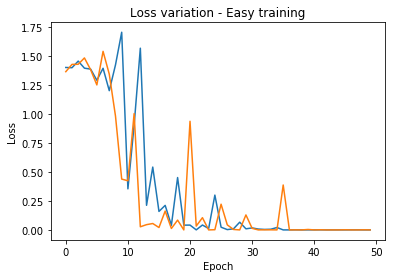

In [3]:
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

criterion = nn.NLLLoss()
optimizer = optim.SGD(model_norm.parameters(), lr=0.01, momentum=0.9)

import time
start_time = time.time()
print("Started training")

epochs = 50
print_interval = 500 #prints every p_i*4
tempo = []
acc = []

#TRAIN THE RELU MODEL
for epoch in range(epochs):  # nbr epochs
    for batch_idx, (data, target) in enumerate(train_loader): #nbr batch,in,out
        data, target = Variable(data), Variable(target)
        
        #On resize pour la sortie
        data = data.view(-1, 32*32)

        #init l'entrainement
        optimizer.zero_grad()
        net_out = model_norm(data)

        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()

        #afficher la progression
        if batch_idx % print_interval == 0:
            #le print statement le plus illisible du monde
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch+1, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.data[0]))
    tempo.append(epoch)
    acc.append(loss.data[0])
print("Finished training of ReLu model in  %.3f seconds " % (time.time() - start_time))

#TEST THE RELU MODEL
test_loss = 0
correct = 0

for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    
    #rescale
    data = data.view(-1, 32 * 32)
    net_out = model_norm(data)
    
    #somme des pertes du batch
    test_loss += criterion(net_out, target).data[0]
    pred = net_out.data.max(1)[1] #prediction
    correct += pred.eq(target.data).sum() #output du réseau

test_loss /= len(test_loader.dataset) #loss = loss/length set
print('\nRELU Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

##################################################################
criterion = nn.NLLLoss()
optimizer = optim.SGD(model_leaky.parameters(), lr=0.01, momentum=0.9)
tempo2 = []
acc2 = []
#TRAIN THE LEAKY RELU MODEL
for epoch in range(epochs):  # nbr epochs
    for batch_idx, (data, target) in enumerate(train_loader): #nbr batch,in,out
        data, target = Variable(data), Variable(target)
        
        #On resize pour la sortie
        data = data.view(-1, 32*32)

        #init l'entrainement
        optimizer.zero_grad()
        net_out = model_leaky(data)

        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()

        #afficher la progression
        if batch_idx % print_interval == 0:
            #le print statement le plus illisible du monde
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch+1, batch_idx * len(data), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader), loss.data[0]))
    tempo2.append(epoch)
    acc2.append(loss.data[0])
    
print("Finished leaky relu training in  %.3f seconds " % (time.time() - start_time))
#TEST THE LEAKY RELU MODEL
test_loss = 0
correct = 0

for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    
    #rescale
    data = data.view(-1, 32 * 32)
    net_out = model_leaky(data)
    
    #somme des pertes du batch
    test_loss += criterion(net_out, target).data[0]
    pred = net_out.data.max(1)[1] #prediction
    correct += pred.eq(target.data).sum() #output du réseau

test_loss /= len(test_loader.dataset) #loss = loss/length set
print('\nLEAKY-RELU Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))



plt.plot(tempo, acc)
plt.plot(tempo2, acc2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss variation - Easy training')
plt.savefig('Loss_easytraining.png')
plt.show()